# Detection of Myocardial Infarction using PTB Diagnostic ECG database

In [1]:
import pandas as pd

In [2]:
ndata = pd.read_csv(r"path",header=None)
#This is the normal ptbdb where the last column for all rows is 0 meaning these patients were healthy.

In [3]:
ndata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ndata.shape

(4046, 188)

In [5]:
abdata = pd.read_csv(r"path",header=None)
#The last column is observed to be 1 for all rows meaning these patients were infected with MI

In [6]:
abdata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
abdata.shape

(10506, 188)

#### Sampling frequency = 125Hz
#### This indicates that the time scale = 1/125 = 0.008seconds

## Visualization 

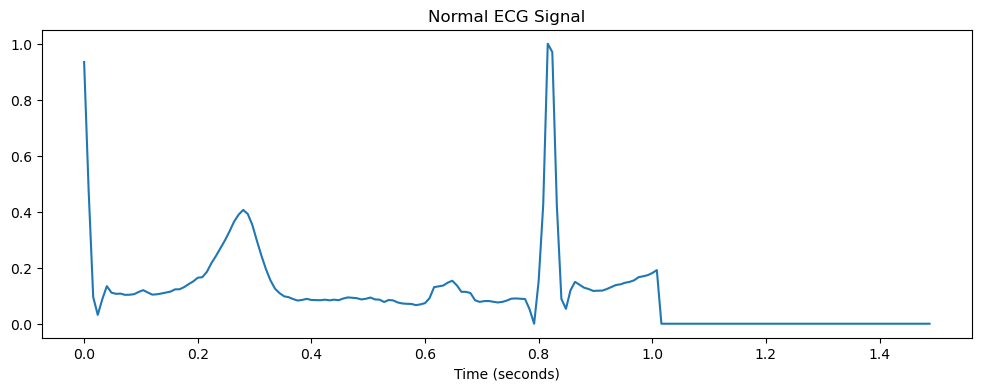

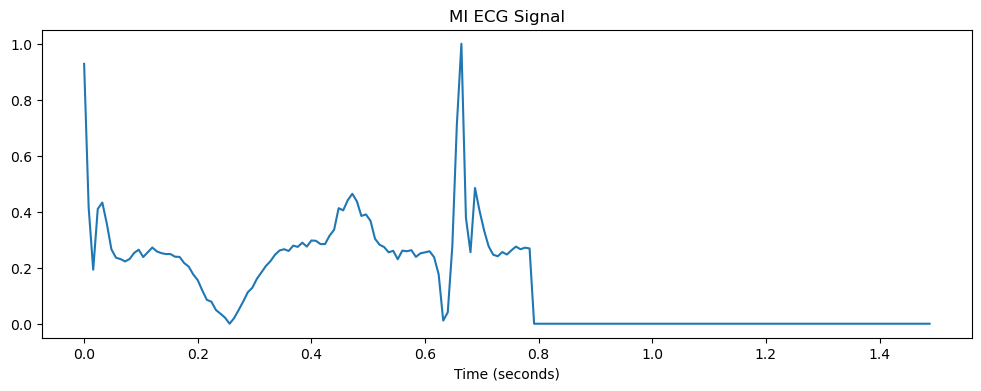

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time scale
time_scale = 0.008  #seconds

# Generate time axis based on the time scale
time_axis = np.arange(ndata.shape[1] - 1) * time_scale


random_row_index = np.random.randint(0, ndata.shape[0])

# Plot Normal ECG signal with adjusted time scale
plt.figure(figsize=(12, 4))
plt.plot(time_axis, ndata.iloc[random_row_index, :-1])
plt.title("Normal ECG Signal")
plt.xlabel("Time (seconds)")
plt.show()

# Plot MI ECG signal with adjusted time scale
plt.figure(figsize=(12, 4))
plt.plot(time_axis, abdata.iloc[random_row_index, :-1])
plt.title("MI ECG Signal")
plt.xlabel("Time (seconds)")
plt.show()

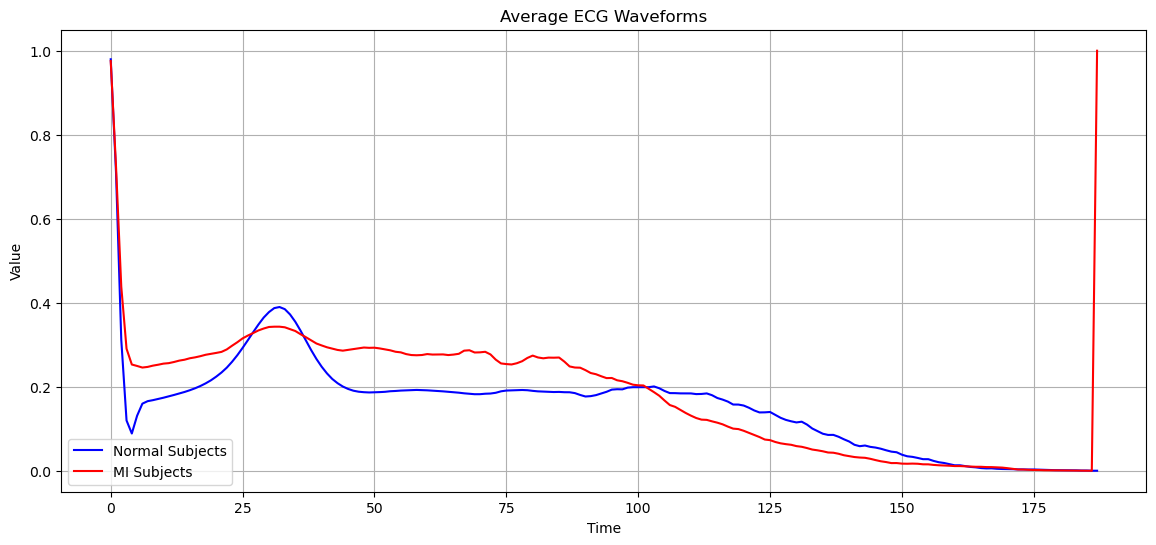

In [68]:
# Calculate average ECG waveform for normal subjects
avg_ndata = np.mean(ndata, axis=0)

# Calculate average ECG waveform for MI subjects
avg_abdata = np.mean(abdata, axis=0)

# Plotting average ECG waveforms
plt.figure(figsize=(14, 6))
plt.plot(avg_ndata, label='Normal Subjects', color='blue')
plt.plot(avg_abdata, label='MI Subjects', color='red')
plt.title('Average ECG Waveforms')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
concatenated_data = pd.concat([ndata, abdata],ignore_index=True)
shuffled_data = concatenated_data.sample(frac=1, random_state=0) # shuffle the data 
shuffled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
13047,1.000000,0.546901,0.032509,0.054182,0.080596,0.115137,0.151710,0.170674,0.160853,0.162547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1392,1.000000,0.514158,0.109091,0.034873,0.037258,0.112668,0.152012,0.184501,0.203875,0.213413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9452,0.971169,0.485782,0.140995,0.000000,0.026461,0.101106,0.084123,0.092417,0.093207,0.093602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9390,0.977832,0.843596,0.881773,0.698276,0.543103,0.407635,0.427340,0.411330,0.385468,0.418719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11643,1.000000,0.849860,0.496919,0.426891,0.336695,0.331092,0.349020,0.337255,0.334454,0.334454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
all_data = shuffled_data
all_data.reset_index(drop=True, inplace=True)
all_data.shape

(14552, 188)

In [71]:
all_data.rename(columns={ndata.columns[-1]: 'Status'}, inplace=True)

In [72]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Status
0,1.000000,0.546901,0.032509,0.054182,0.080596,0.115137,0.151710,0.170674,0.160853,0.162547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.514158,0.109091,0.034873,0.037258,0.112668,0.152012,0.184501,0.203875,0.213413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.971169,0.485782,0.140995,0.000000,0.026461,0.101106,0.084123,0.092417,0.093207,0.093602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977832,0.843596,0.881773,0.698276,0.543103,0.407635,0.427340,0.411330,0.385468,0.418719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.849860,0.496919,0.426891,0.336695,0.331092,0.349020,0.337255,0.334454,0.334454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


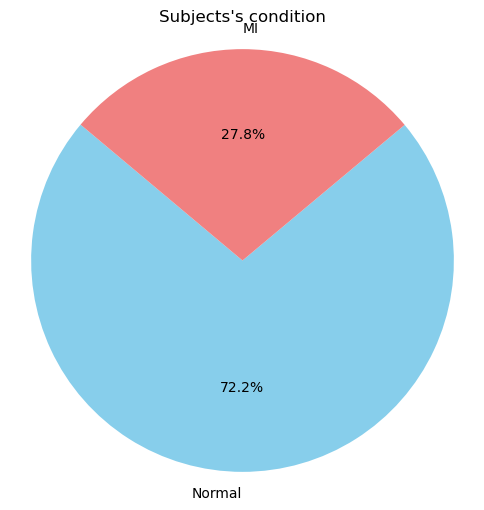

In [73]:
# Assuming the last column is named 'Status' where 0 represents normal and 1 represents infected

# Count occurrences of each category
status_counts = all_data['Status'].value_counts()
label = ['Normal', 'MI']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=label, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Subjects's condition")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [74]:
data = all_data.iloc[:,:-1]

In [75]:
data.shape

(14552, 187)

In [76]:
from imblearn.over_sampling import SMOTE

# Extract the features and labels
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1]

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print("Class distribution after resampling:", dict(zip(unique, counts)))


Class distribution after resampling: {0.0: 10506, 1.0: 10506}


In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca.fit(X_resampled)

# Transform the data
pca_features = pca.transform(X_resampled)

# Print the shape of PCA features
print("Shape of PCA features after SMOTE:", pca_features.shape)

Shape of PCA features after SMOTE: (21012, 37)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_features, y_resampled, test_size=0.2, random_state=42)

In [79]:
X_train.shape

(16809, 37)

In [96]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier:", accuracy_knn)


Accuracy of KNN classifier: 0.9469426600047585


C:\Users\Siddhi Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 1.n=5 -->acc = 94.69
#### 2.n=7 -->acc = 93.81
#### 3. n =8 -->acc = 92.88

In [115]:
from sklearn.svm import SVC

# Create and train SVM classifier
#svm = SVC(kernel='linear', random_state=42)
#svm = SVC(kernel='sigmoid', gamma='scale', coef0=0.0, random_state=42)
svm = SVC(kernel='poly', degree=3, gamma='scale', coef0=1,probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier:", accuracy_svm)


Accuracy of SVM classifier: 0.9412324530097549


#### kernel = linear  acc - 0.78
#### kernel = sigmoid acc - 0.58
#### kernel = polynomial with deg 3 acc - 0.94 

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=135, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest classifier:", accuracy_rf)


Accuracy of Random Forest classifier: 0.9628836545324768


#### n_estimators 90 - 96
####                      100 - 96.05
####                       120 - 96.12
####                       130 - 96.14
####                        135 - 96.28
####                        140 - 96.12..

In [106]:
knn_predictions = knn.predict(X_test)
rf_predictions = rf.predict(X_test)
svm_predictions = svm.predict(X_test)

C:\Users\Siddhi Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)


print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)


print("\nKNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)



svm_accuracy = accuracy_score(y_test, svm_predictions )
svm_precision = precision_score(y_test,svm_predictions )
svm_recall = recall_score(y_test, svm_predictions )
svm_f1 = f1_score(y_test, svm_predictions )


print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)



Random Forest Metrics:
Accuracy: 0.9628836545324768
Precision: 0.9747524752475247
Recall: 0.9493731918997107
F1 Score: 0.9618954567659991

KNN Metrics:
Accuracy: 0.9469426600047585
Precision: 0.9848088004190676
Recall: 0.9064609450337512
F1 Score: 0.9440120512176751

SVM Metrics:
Accuracy: 0.9412324530097549
Precision: 0.9672634271099744
Recall: 0.9117647058823529
F1 Score: 0.9386944651278232


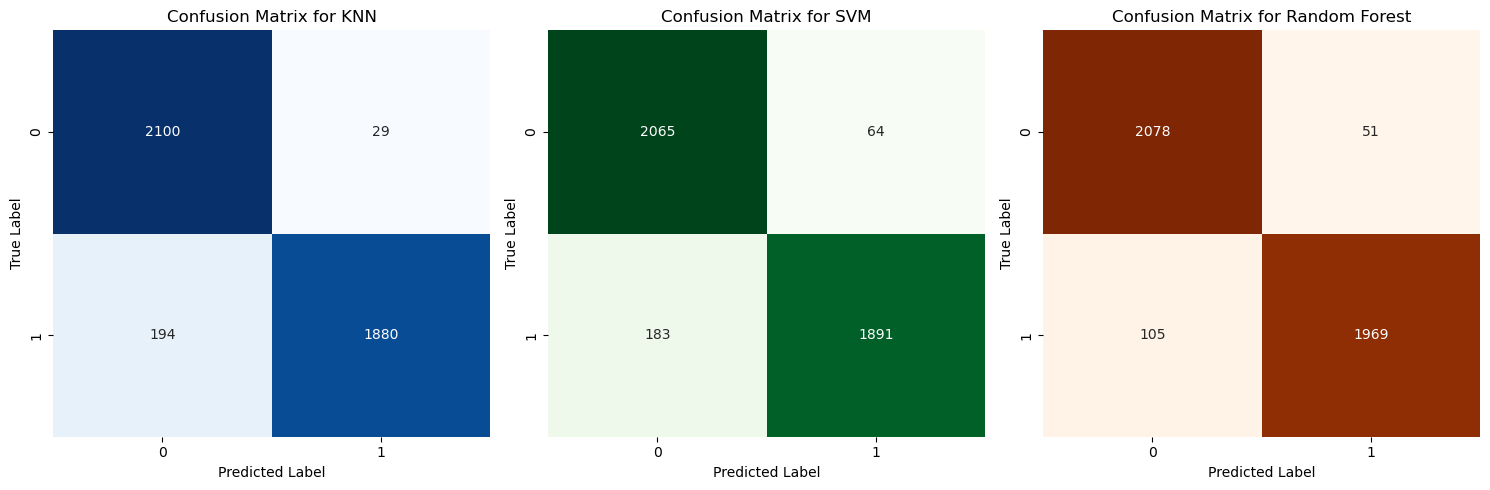

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrices side by side with different colors

# Confusion matrix for KNN
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Confusion Matrix for KNN")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix for SVM
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens',cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix for Random Forest
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges',cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


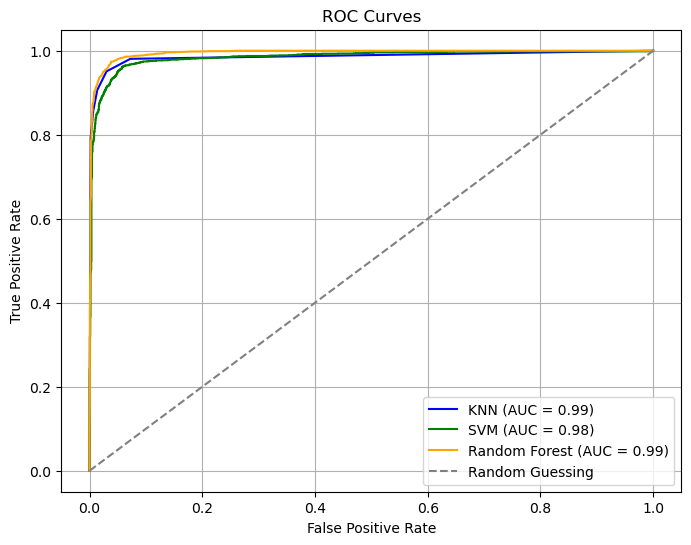

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])


fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])


plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='orange')

# Plot random guessing (baseline) line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
